# JMP

Sometimes, it's convenient to train a model in JMP (using a GUI rather than writing code). JMP markets this as ML without coding. This notebook shows how to load a JMP model into Python using JENN. 

### Libraries

In [1]:
import jenn
import numpy as np 

### Load Model

JMP was used to train a model using the data generated above. The resulting equation is shown below, obtained using the "Save Profile Formulas" with copy/paste. A single line of code will load it into Python:  

In [2]:
jmp_model = jenn.utils.from_jmp(equation="data/jmp_two_layer_model.txt")

### Predict

Predict partials analytically (something that cannot be done in JMP): 

In [3]:
y, dy_dx = jmp_model.evaluate(x=np.array([[0.5], [0.25]]))
y, dy_dx

(array([[30.19957274]]),
 array([[[-0.56244757],
         [56.88250962]]]))

### Check Goodness of Fit

In [4]:
data = np.genfromtxt("data/jmp_example_data.csv", delimiter=",", skip_header=True, dtype=np.float64).T

In [5]:
x_test = data[0:2]
y_test = data[2].reshape((1, -1))

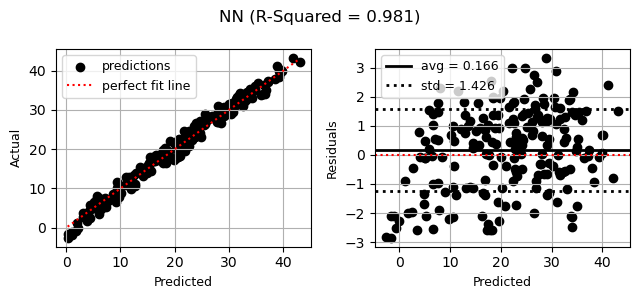

In [6]:
jenn.utils.plot.goodness_of_fit(
    y_true=y_test, 
    y_pred=jmp_model.predict(x_test),
    title="NN"
)

In [8]:
assert jenn.utils.metrics.r_square(
    y_pred=jmp_model.predict(x_test), 
    y_true=y_test, 
) > 0.98

---
### Synthetic Data

_To generate new sample data, use the following function and load the CSV into JMP:_ 

In [9]:
def generate_synthetic_data(nsamples: int = 100, filename: str = "jmp_example_data.csv"): 
    """Sample Rastrigin function and save to file."""
    xmin = (-1.0, -1.0)
    xmax = (1.5, 1.5)
    func = jenn.synthetic.Rastrigin
    x, y, _ = func.sample(m_lhs=nsamples, m_levels=0, lb=xmin, ub=xmax)
    np.savetxt(filename, np.concatenate([x, y]).T, delimiter=",", header="x1, x2, y", comments="")